
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**Download the fashion mnist dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

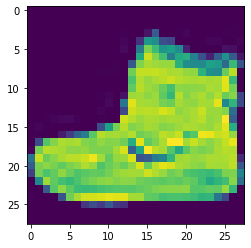

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train[0]    # ankle boot

9

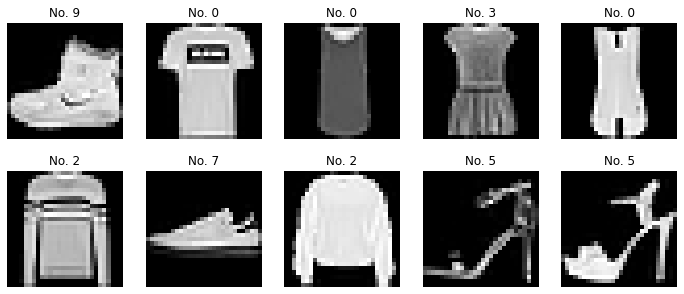

In [6]:
f, ax = plt.subplots(2, 5, figsize=(12,5))

for r in range(2):
    for c in range(5):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [7]:
X_train.max()

255

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
X_train.max()

1.0

**Reshape the X into 4 dimension**

In [11]:
X_train[0].shape[0]

28

In [12]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [13]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [17]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [38]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               605824    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [40]:
model.fit(X_train, Y_train, batch_size=32, validation_split=.15, epochs=10)

Epoch 1/10
1594/1594 [==============================] - 12s 8ms/step - loss: 0.4029 - accuracy: 0.8581 - val_loss: 0.3116 - val_accuracy: 0.8893
Epoch 2/10
1594/1594 [==============================] - 12s 7ms/step - loss: 0.2697 - accuracy: 0.9032 - val_loss: 0.2811 - val_accuracy: 0.8957
Epoch 3/10
1594/1594 [==============================] - 12s 7ms/step - loss: 0.2247 - accuracy: 0.9182 - val_loss: 0.2611 - val_accuracy: 0.9059
Epoch 4/10
1594/1594 [==============================] - 11s 7ms/step - loss: 0.1945 - accuracy: 0.9277 - val_loss: 0.2457 - val_accuracy: 0.9109
Epoch 5/10
1594/1594 [==============================] - 11s 7ms/step - loss: 0.1670 - accuracy: 0.9374 - val_loss: 0.2445 - val_accuracy: 0.9137
Epoch 6/10
1594/1594 [==============================] - 11s 7ms/step - loss: 0.1449 - accuracy: 0.9463 - val_loss: 0.2509 - val_accuracy: 0.9114
Epoch 7/10
1594/1594 [==============================] - 12s 7ms/step - loss: 0.1240 - accuracy: 0.9539 - val_loss: 0.2633 - val_ac

**Plot values of metrics you used in your model.**

In [41]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.402890,0.858098,0.311630,0.889333
1,0.269662,0.903235,0.281113,0.895667
2,0.224737,0.918196,0.261090,0.905889
3,0.194532,0.927667,0.245693,0.910889
4,0.167030,0.937431,0.244500,0.913667


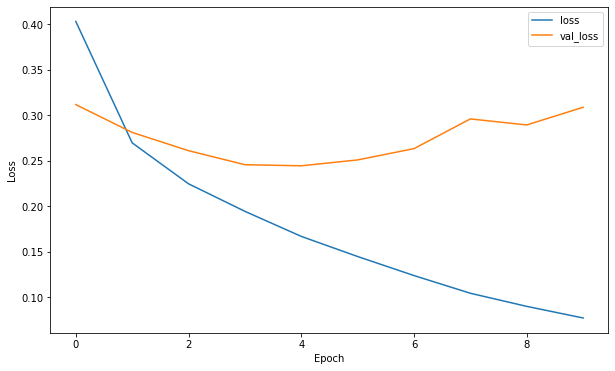

In [43]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend();

model is overfitting

**Train the model using earlystop.**

In [99]:
from tensorflow.keras.callbacks import EarlyStopping

In [100]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [101]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [102]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3906 - accuracy: 0.8618 - val_loss: 0.3279 - val_accuracy: 0.8805
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2678 - accuracy: 0.9033 - val_loss: 0.2827 - val_accuracy: 0.8989
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2238 - accuracy: 0.9185 - val_loss: 0.2788 - val_accuracy: 0.8968
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1899 - accuracy: 0.9301 - val_loss: 0.2550 - val_accuracy: 0.9093
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1605 - accuracy: 0.9412 - val_loss: 0.2565 - val_accuracy: 0.9123
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1379 - accuracy: 0.9490 - val_loss: 0.2554 - val_accuracy: 0.9139


**Plot values of metrics you used in your model.**

In [103]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.390593,0.861750,0.327876,0.8805
1,0.267767,0.903333,0.282736,0.8989
2,0.223756,0.918483,0.278799,0.8968
3,0.189870,0.930133,0.255019,0.9093
4,0.160492,0.941200,0.256532,0.9123


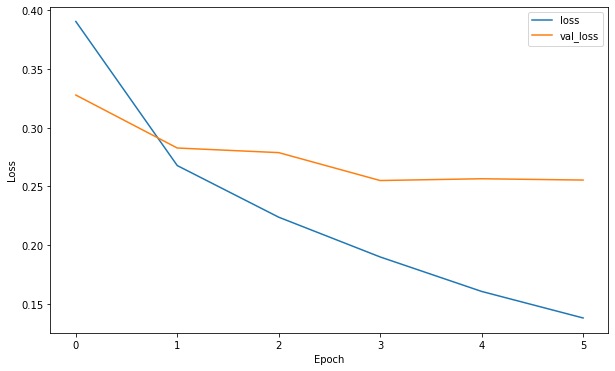

In [104]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend();

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [105]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 1s 2ms/step - loss: 0.2554 - accuracy: 0.9139
[0.2554166913032532, 0.9139000177383423]


In [106]:
from sklearn.metrics import classification_report,confusion_matrix

In [107]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [108]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [109]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.89      0.84      0.87      1000
           3       0.94      0.89      0.92      1000
           4       0.85      0.89      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.70      0.81      0.75      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.92     10000
weighted avg       0.92      0.91      0.92     10000



In [110]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2554166913032532
Test accuracy: 0.9139000177383423


# Prediction

In [111]:
pred_sample = X_test[0]

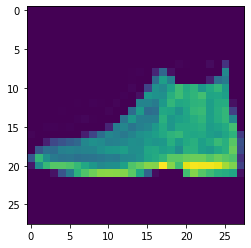

In [112]:
plt.imshow(pred_sample.reshape(28,28))

In [113]:
model.predict(pred_sample.reshape(1,28,28,1))

array([[5.1230398e-07, 9.9466502e-10, 2.8329075e-07, 9.8305933e-11,
        1.6754347e-08, 8.4042213e-06, 7.3277896e-08, 2.7264001e-05,
        3.9142265e-08, 9.9996340e-01]], dtype=float32)

In [114]:
np.argmax(model.predict(pred_sample.reshape(1,28,28,1)), axis=1)

array([9], dtype=int64)

In [115]:
y_test[0]

9

# End of Assignment

we correctly predicted label 9 which is Ankle Boot